In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = "/content/drive/MyDrive/final_ODI_data.csv"
df = pd.read_csv(file_path)
df.head()

,Player,Runs,Mins,BF,4s,6s,SR,Inns,Opposition,Ground,Start Date,Team,Year,Month,runs_by_running,perc_runs_by_running,Match_Number,Decade
0,G Boycott,8,34,37,0,0,21.62,1,Australia,Melbourne,1971-01-05,ENG,1971,1,8,100.00,1,1970
1,JH Edrich,82,150,119,4,0,68.90,1,Australia,Melbourne,1971-01-05,ENG,1971,1,66,80.49,1,1970
2,KWR Fletcher,24,60,47,1,0,51.06,1,Australia,Melbourne,1971-01-05,ENG,1971,1,20,83.33,1,1970
3,BL D'Oliveira,17,20,16,1,0,106.25,1,Australia,Melbourne,1971-01-05,ENG,1971,1,13,76.47,1,1970
4,JH Hampshire,10,13,13,0,0,76.92,1,Australia,Melbourne,1971-01-05,ENG,1971,1,10,100.00,1,1970


In [4]:
df.describe()

,Runs,Mins,BF,4s,6s,SR,Inns,Year,Month,runs_by_running,perc_runs_by_running,Match_Number,Decade
count,82658.000000,82658.000000,82658.000000,82658.000000,82658.000000,82658.000000,82658.000000,82658.000000,82658.000000,82658.000000,82658.000000,82658.000000,82658.000000
mean,22.950991,42.327917,30.369970,1.996685,0.319255,68.062137,1.465436,2004.866546,5.886424,13.048719,59.064859,2373.082327,2000.286724
std,26.674912,37.759486,30.332194,2.749911,0.860387,46.346952,0.498807,11.736734,3.680923,15.284818,33.507541,1358.931609,12.186673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1971.000000,1.000000,0.000000,0.000000,1.000000,1970.000000
25%,4.000000,14.000000,8.000000,0.000000,0.000000,38.880000,1.000000,1997.000000,2.000000,2.000000,36.000000,1198.000000,1990.000000
50%,13.000000,42.000000,20.000000,1.000000,0.000000,65.620000,1.000000,2006.000000,6.000000,7.000000,60.000000,2378.000000,2000.000000
75%,33.000000,49.000000,44.000000,3.000000,0.000000,91.540000,2.000000,2014.000000,9.000000,18.000000,100.000000,3553.000000,2010.000000
max,264.000000,281.000000,201.000000,33.000000,17.000000,600.000000,2.000000,2024.000000,12.000000,112.000000,100.000000,4693.000000,2020.000000


# No Of innings where more than 300 have been scored

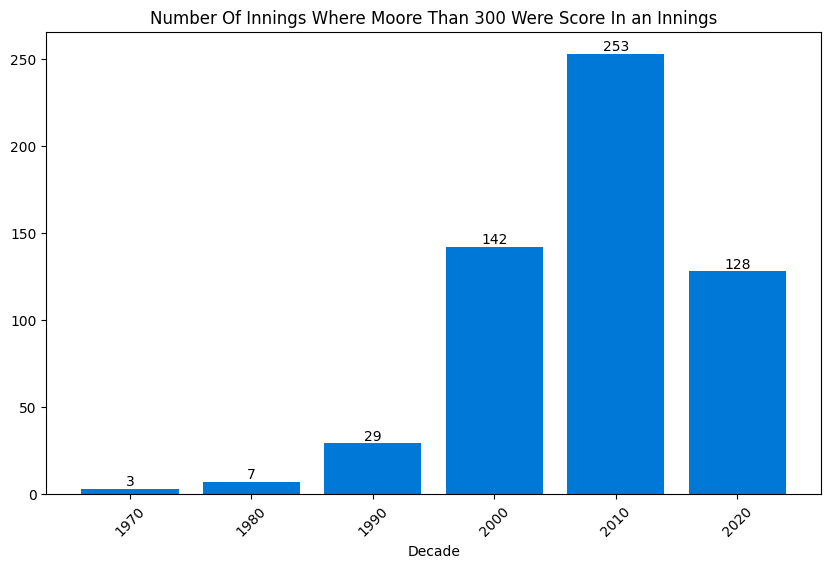

In [5]:
import matplotlib.pyplot as plt

total_runs_per_innings = df.groupby(['Match_Number', 'Inns', 'Decade'])['Runs'].sum().reset_index()
high_scoring_innings = total_runs_per_innings[total_runs_per_innings['Runs'] > 300]
high_scoring_counts = high_scoring_innings.groupby('Decade')['Match_Number'].count().reset_index()
high_scoring_counts.rename(columns={'Match_Number': 'High_Scoring_Innings_Count'}, inplace=True)

# Creating a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(high_scoring_counts['Decade'].astype(str), high_scoring_counts['High_Scoring_Innings_Count'], color='#0078D7')
plt.grid(False)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.xlabel('Decade')
plt.ylabel('')
plt.title('Number Of Innings Where Moore Than 300 Were Score In an Innings')
plt.xticks(rotation=45)

plt.show()

# Ranking Players By Strike Rate and Percentage Runs By Running

In [ ]:
# Filter players who have scored more than 8000 runs
players_total_runs = df.groupby('Player')['Runs'].sum()
players_above_8000 = players_total_runs[players_total_runs > 8000].index

filtered_data = df[df['Player'].isin(players_above_8000)]

In [ ]:
# Calculating player stats
player_totals = filtered_data.groupby('Player').agg({'Runs': 'sum', 'BF': 'sum'})

player_totals['SR'] = (player_totals['Runs'] / player_totals['BF']) * 100

player_stats = player_totals.join(filtered_data.groupby('Player')['perc_runs_by_running'].mean())

In [ ]:
# Rank players separately by SR and perc_runs_by_running
player_stats['SR_rank'] = player_stats['SR'].rank(ascending=False)  # Higher SR, better rank
player_stats['perc_runs_rank'] = player_stats['perc_runs_by_running'].rank(ascending=False)  # Higher percentage, better rank

# Calculate the average rank
player_stats['average_rank'] = (player_stats['SR_rank'] + player_stats['perc_runs_rank']) / 2

# Sort players based on the average rank
top_players = player_stats.sort_values('average_rank').reset_index()


In [ ]:
top_players.sort_values('SR_rank')[['Player', 'SR_rank']][:10]

,Player,SR_rank
9,Shahid Afridi,1.0
20,V Sehwag,2.0
2,AB de Villiers,3.0
21,AC Gilchrist,4.0
1,V Kohli,5.0
11,RG Sharma,6.0
18,ST Jayasuriya,7.0
10,HM Amla,8.0
13,Yuvraj Singh,9.0
3,MS Dhoni,10.0


In [ ]:
top_players.sort_values('perc_runs_rank')[['Player', 'perc_runs_rank']][:10]

,Player,perc_runs_rank
7,M Azharuddin,1.0
4,ME Waugh,2.0
16,S Chanderpaul,3.0
0,PA de Silva,4.0
24,DL Haynes,5.0
22,MS Atapattu,6.0
6,DPMD Jayawardene,7.0
12,Mohammad Yousuf,8.0
27,R Dravid,9.0
19,Inzamam-ul-Haq,10.0


In [ ]:
top_players.head(15)

,Player,Runs,BF,SR,perc_runs_by_running,SR_rank,perc_runs_rank,average_rank
0,PA de Silva,9284,11443,81.132570,63.609764,16.0,4.0,10.0
1,V Kohli,13848,14797,93.586538,56.305857,5.0,16.0,10.5
2,AB de Villiers,9577,9473,101.097857,53.671651,3.0,20.0,11.5
3,MS Dhoni,10773,12303,87.564009,58.112290,10.0,14.0,12.0
4,ME Waugh,8500,11053,76.902198,65.772161,23.0,2.0,12.5
5,LRPL Taylor,8607,10330,83.320426,59.917636,14.0,12.0,13.0
6,DPMD Jayawardene,12650,16020,78.963795,62.665933,20.0,7.0,13.5
7,M Azharuddin,9378,12669,74.023206,73.018669,26.0,1.0,13.5
8,TM Dilshan,10290,11933,86.231459,55.664620,13.0,17.0,15.0
9,Shahid Afridi,8064,6892,117.005223,45.109404,1.0,30.0,15.5


In [ ]:
csv_data = top_players.to_csv(index=False)

with open('top_players.csv', 'w') as csv_file:
    csv_file.write(csv_data)

from google.colab import files
files.download('top_players.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Future Prediction

In [9]:
#Linear Regression

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load your data
# df = pd.read_csv('path_to_your_csv_file.csv')

# Aggregate data annually
annual_data = df.groupby('Year').agg({
    '4s': 'sum',
    '6s': 'sum',
    'Runs': 'sum',
    'BF': 'sum',
    'SR': 'mean',
    'Match_Number': 'nunique'  # Assuming 'Match_Number' is the unique identifier for matches
}).reset_index()

# Forecasting function for an explanatory variable
def forecast_explanatory_variable(data, variable, future_years):
    years = np.array(data['Year']).reshape(-1, 1)
    values = data[variable]

    model = LinearRegression()
    model.fit(years, values)

    future_years_array = np.array(range(years[-1, 0] + 1, years[-1, 0] + 1 + future_years)).reshape(-1, 1)
    predicted_values = model.predict(future_years_array)
    return predicted_values

# Forecasting explanatory variables for the next 5 years
future_years = 5
predicted_bf = forecast_explanatory_variable(annual_data, 'BF', future_years)
predicted_sr = forecast_explanatory_variable(annual_data, 'SR', future_years)
predicted_matches = forecast_explanatory_variable(annual_data, 'Match_Number', future_years)

# Linear Regression for 4s, 6s, and Runs
def build_and_train_model(data, target):
    X = data[['BF', 'SR', 'Match_Number']]
    y = data[target]

    model = LinearRegression()
    model.fit(X, y)
    return model

model_4s = build_and_train_model(annual_data, '4s')
model_6s = build_and_train_model(annual_data, '6s')
model_runs = build_and_train_model(annual_data, 'Runs')

# Predicting Future 4s, 6s, and Runs
future_data = np.column_stack((predicted_bf, predicted_sr, predicted_matches))
predicted_4s = model_4s.predict(future_data)
predicted_6s = model_6s.predict(future_data)
predicted_runs = model_runs.predict(future_data)

# Print Predictions
for i in range(future_years):
    print(f"Year {annual_data['Year'].iloc[-1] + i + 1}: Predicted 4s = {predicted_4s[i]}, Predicted 6s = {predicted_6s[i]}, Predicted Runs = {predicted_runs[i]}")



Year 2025: Predicted 4s = 6020.970269162748, Predicted 6s = 1109.0488973612687, Predicted Runs = 66604.61228884399
Year 2026: Predicted 4s = 6128.7752486474255, Predicted 6s = 1131.6075778040304, Predicted Runs = 67749.10122055939
Year 2027: Predicted 4s = 6236.580228132141, Predicted 6s = 1154.1662582467998, Predicted Runs = 68893.59015227493
Year 2028: Predicted 4s = 6344.385207616853, Predicted 6s = 1176.724938689566, Predicted Runs = 70038.07908399068
Year 2029: Predicted 4s = 6452.190187101531, Predicted 6s = 1199.283619132328, Predicted Runs = 71182.56801570611


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [2]:
import pandas as pd

# Prediction results
predictions = [
    {'Year': 2025, 'Predicted_4s': int(6020.970269162748), 'Predicted_6s': int(1109.0488973612687), 'Predicted_Runs': int(66604.61228884399)},
    {'Year': 2026, 'Predicted_4s': int(6128.7752486474255), 'Predicted_6s': int(1131.6075778040304), 'Predicted_Runs': int(67749.10122055939)},
    {'Year': 2027, 'Predicted_4s': int(6236.580228132141), 'Predicted_6s': int(1154.1662582467998), 'Predicted_Runs': int(68893.59015227493)},
    {'Year': 2028, 'Predicted_4s': int(6344.385207616853), 'Predicted_6s': int(1176.724938689566), 'Predicted_Runs': int(70038.07908399068)},
    {'Year': 2029, 'Predicted_4s': int(6452.190187101531), 'Predicted_6s': int(1199.283619132328), 'Predicted_Runs': int(71182.56801570611)}
]

# Convert the list of dictionaries to a DataFrame
predictions_df = pd.DataFrame(predictions)




In [3]:
predictions_df

,Year,Predicted_4s,Predicted_6s,Predicted_Runs
0,2025,6020,1109,66604
1,2026,6128,1131,67749
2,2027,6236,1154,68893
3,2028,6344,1176,70038
4,2029,6452,1199,71182


In [4]:
csv_data = predictions_df.to_csv(index=False)

with open('predictions.csv', 'w') as csv_file:
    csv_file.write(csv_data)

from google.colab import files
files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>